### Import Packages

In [31]:
import re
import csv
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook
from collections import Counter
import spacy
from spacy import displacy

### Import data

In [ ]:
with open('data/allNews_30%sample_lemmatized.pkl') as csvfile:
    reader1 = csv.reader(csvfile)
data = pd.read_csv('data/allNews_30%sample_lemmatized.pkl',sep='\t')

In [32]:
data = pd.read_pickle("data/allNews_1%sample_lemmatized_nontokenized.pkl")

In [33]:
data.head(2)

,id,title,publication,author,date,year,month,url,content
131500,198273,Ivanka Trump just got booed in Germany for cal...,Vox,Zeeshan Aleem,2017/4/25,2017.0,4.0,http://www.vox.com/world/2017/4/25/15420358/iv...,Ivanka Trump is having trouble convincing the...
5192,23073,"At Debate, Hillary Clinton Leaves Questions Ab...",New York Times,Peter Eavis,2016-04-15,2016.0,4.0,NaN,A jarring regulatory action this week against ...


### Distribution of publication

In [34]:
Counter(data.publication)

Counter({'Vox': 61,
         'New York Times': 84,
         'Atlantic': 71,
         'NPR': 111,
         'National Review': 51,
         'Reuters': 120,
         'Breitbart': 238,
         'Washington Post': 113,
         'Guardian': 78,
         'New York Post': 164,
         'CNN': 122,
         'Talking Points Memo': 45,
         'Fox News': 46,
         'Buzzfeed News': 50,
         'Business Insider': 72})

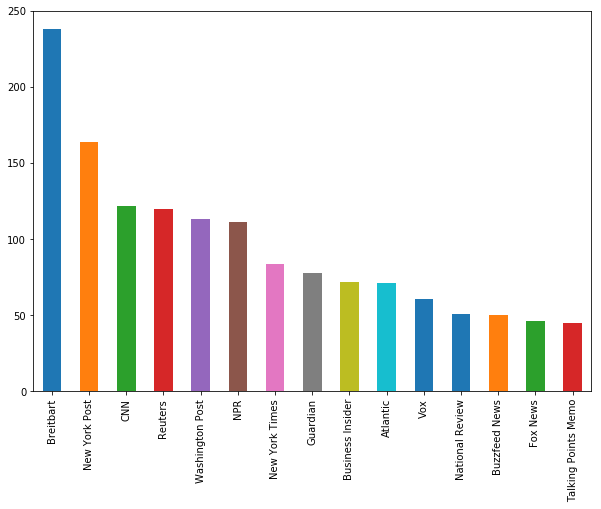

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
data.publication.value_counts().plot(kind='bar')

In [36]:
#for index, row in df.iterrows():
    #print(row['c1'], row['c2'])

nlp = spacy.load('en')
frames = []
for i,row in tqdm_notebook(data.iterrows()):
    doc = row['content']
    text_id = row['id']
    doc = nlp(str(doc))
    ents = [(e.text, e.start_char, e.end_char, e.label_) 
            for e in doc.ents 
            if len(e.text.strip(' -—')) > 0]
    frame = pd.DataFrame(ents)
    frame['id'] = text_id
    frames.append(frame)

In [37]:
npf = pd.concat(frames)
npf.head(10)

/Users/yidingweng/anaconda3/envs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,0,1,2,3,id
0,Ivanka Trump,0.0,13.0,ORG,198273
1,W20,155.0,158.0,PERSON,198273
2,Berlin,267.0,273.0,GPE,198273
3,Germany,275.0,282.0,GPE,198273
4,Tuesday,287.0,294.0,DATE,198273
5,Trump,912.0,917.0,PERSON,198273
6,one,982.0,985.0,CARDINAL,198273
7,” Miriam Meckel,1148.0,1163.0,PERSON,198273
8,German,1175.0,1181.0,NORP,198273
9,WirtschaftsWoche,1200.0,1216.0,ORG,198273


In [38]:
npf.columns = ['Text','Start','Stop','Type','id']

### Distribution of types of predefined words

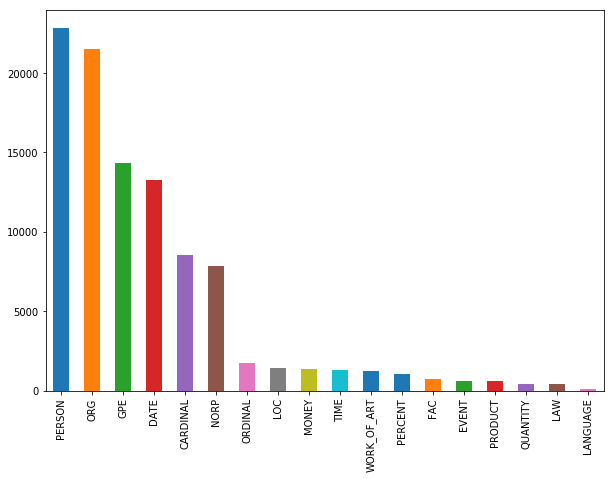

In [39]:
plt.figure(figsize=(10,7))
npf.Type.value_counts().plot(kind='bar')

### Organizations that are commonly featured

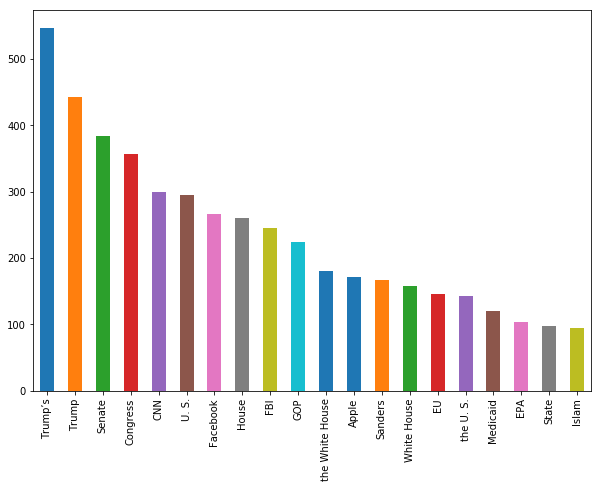

In [55]:
orgs = npf[npf.Type == 'ORG']
plt.figure(figsize=(10,7))
orgs.Text.value_counts()[:20].plot(kind='bar')

### Individuals that are commonly featured

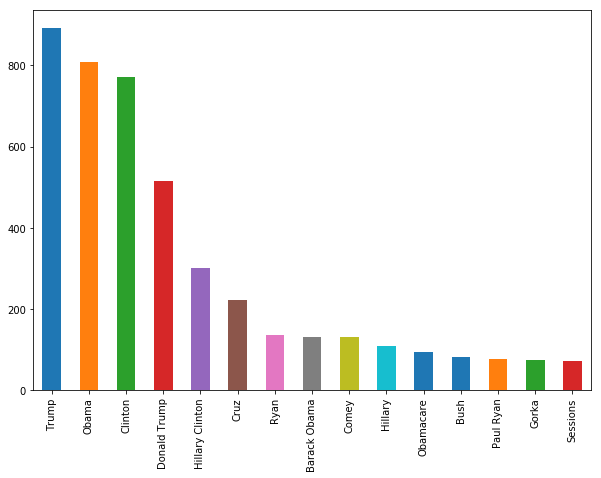

In [41]:
orgs = npf[npf.Type == 'PERSON']
plt.figure(figsize=(10,7))
orgs.Text.value_counts()[:15].plot(kind='bar')